# Computational Social Science Project #3 

**Enter your Name:** Anna Cheyette

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [39]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [40]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [41]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [42]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [43]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [44]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

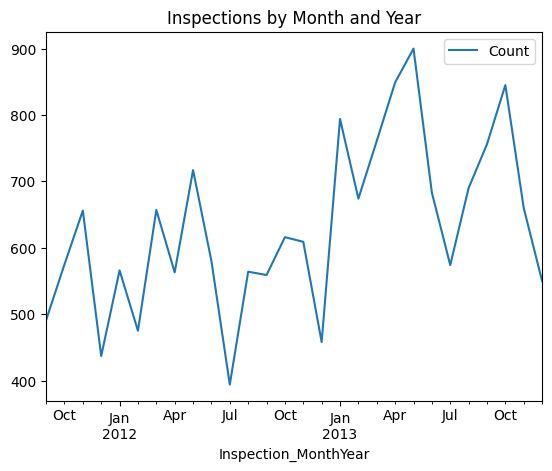

In [45]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

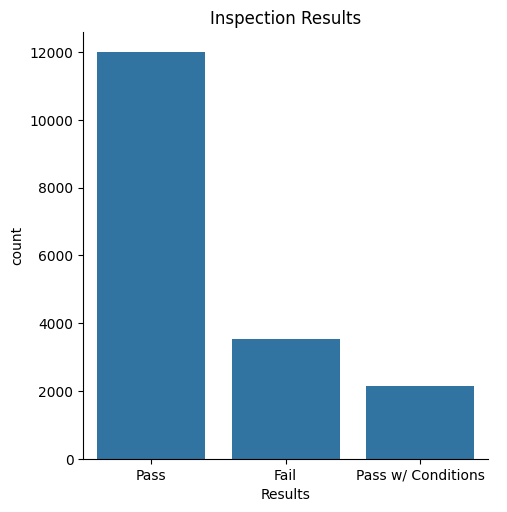

In [46]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

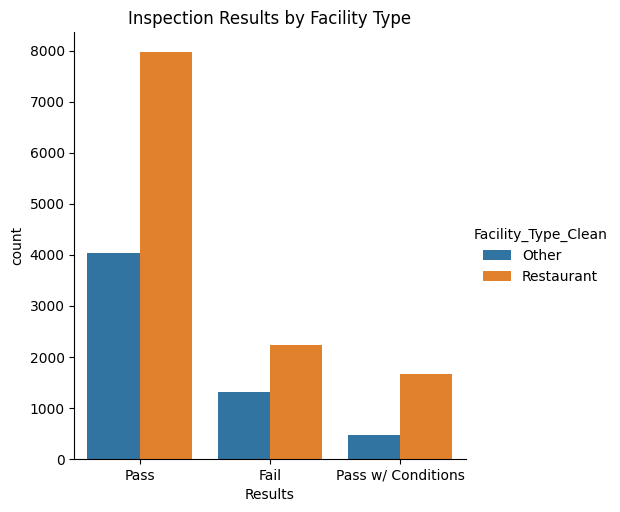

In [47]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## 2. Data Preprocessing and Cleaning

In [48]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [ ]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# binarize the outcome variable 
# -----------
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])

# get dummies
X = pd.get_dummies(X)

In [15]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

**Random Forest** creates multiple decision trees and averages their predictions. Its main advantages are handling mixed data types and being resistant to overfitting. Its main downsides are that it is computationally expensive and may be harder to interpret compared to single decision trees. For food inspections, it's useful because the data includes various types (business details, past inspections, neighborhood data) and likely contains complex relationships between these features.

**AdaBoost** builds sequential models that focus on correcting previous mistakes. Its strengths include good performance on binary classification and relative simplicity. Limitations are sensitivity to noisy data and potentially slower training time. This fits food inspection prediction because it's a binary outcome (pass/fail) and can identify problematic cases that might need priority inspection.

**XGBoost** is a gradient boosting implementation that builds trees sequentially with regularization. It typically provides strong accuracy and handles missing values well, but requires more parameter tuning and can be less interpretable. It's appropriate for food inspection prediction because restaurants have varying characteristics (size, cuisine, location) that likely interact in complex ways to influence inspection outcomes. Also, inspection history patterns may be important predictors, and XGBoost's structure can capture these relationships.

### Model 1: Random Forest

In [16]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state = 10)
# Get parameters
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [17]:
## Hyperparameter Tuning ##

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None],
    'min_impurity_decrease': [1e-07],
    'criterion': ['gini']
}

# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=3,                # 3-fold cross-validation
    scoring='f1', 
    n_jobs=-1            # using all processors
)

# Fit grid search on all data - we will use cross-validation to evaluate performance
grid_search.fit(X, y.ravel())

# Get the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# The best model is stored in grid_search.best_estimator_
best_rf_model = grid_search.best_estimator_


Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_impurity_decrease': 1e-07, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.825928349194172


In [18]:
# define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Evaluate the best RF model using cross_validate
rf_cv_results = cross_validate(
    best_rf_model,
    X,
    y,
    cv=3,
    scoring=scoring,
    return_estimator=True
)

# Print all metrics
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    scores = rf_cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.924
precision: 0.770
recall: 0.891
f1: 0.826


###  Model 2: Adaboost

In [19]:
# Adaboost
ada_classifier = AdaBoostClassifier()

ada_classifier.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [20]:
# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=ada_classifier,
    param_grid=param_grid,
    cv=3,                # 3-fold cross-validation
    scoring='f1',
    n_jobs=-1           # Use all available cores
)

# Fit grid search on all data
grid_search.fit(X, y.ravel())

# Get the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# The best model is stored in grid_search.best_estimator_
best_ada_model = grid_search.best_estimator_

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation score: 0.8314959464099817


In [21]:
# Evaluate the best AdaBoost model using cross_validate
ada_cv_results = cross_validate(
    best_ada_model,
    X,
    y.ravel(),
    cv=3,
    scoring=scoring,
    return_estimator=True
)

# Print all metrics
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    scores = ada_cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.922
precision: 0.735
recall: 0.957
f1: 0.831


### Model 3: XGBoost

In [22]:
# Xgboost
xgb_classifier = xgb.XGBClassifier(random_state=10)

xgb_classifier.get_params()


{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 10,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [23]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 1.0]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=3,                # 3-fold cross-validation
    scoring='f1',
    n_jobs=-1           # Use all available cores
)

# Fit grid search on all data
grid_search.fit(X, y.ravel())

# Get the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# The best model is stored in grid_search.best_estimator_
best_xgb_model = grid_search.best_estimator_

Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1.0, 'subsample': 1.0}
Best cross-validation score: 0.8330379808200638


In [24]:
# Evaluate the best XGBoost model using cross_validate
xgb_cv_results = cross_validate(
    best_xgb_model,
    X,
    y.ravel(),
    cv=3,
    scoring=scoring,
    return_estimator=True
)

# Print all metrics
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    scores = xgb_cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.924
precision: 0.751
recall: 0.936
f1: 0.833


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [25]:
# List of model results and their names
cv_results_dict = {
    'Random Forest': rf_cv_results,
    'AdaBoost': ada_cv_results,
    'XGBoost': xgb_cv_results
}

# Loop through each model and print metrics
for model_name, results in cv_results_dict.items():
    print(f"\n{model_name} Metrics:")
    print("-" * 20)
    for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
        scores = results[metric]
        print(f"{metric[5:]}: {scores.mean():.3f}")


Random Forest Metrics:
--------------------
accuracy: 0.924
precision: 0.770
recall: 0.891
f1: 0.826

AdaBoost Metrics:
--------------------
accuracy: 0.922
precision: 0.735
recall: 0.957
f1: 0.831

XGBoost Metrics:
--------------------
accuracy: 0.924
precision: 0.751
recall: 0.936
f1: 0.833


I would want to prioritize both recall and the f1 score here. High recall is essential because missing a failing establishment (false negative) could lead to serious public health consequences - it's more costly to miss an unsafe restaurant than to unnecessarily inspect a safe one. The F1 score is valuable because it balances recall with precision, ensuring we're not simply flagging every establishment for inspection.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

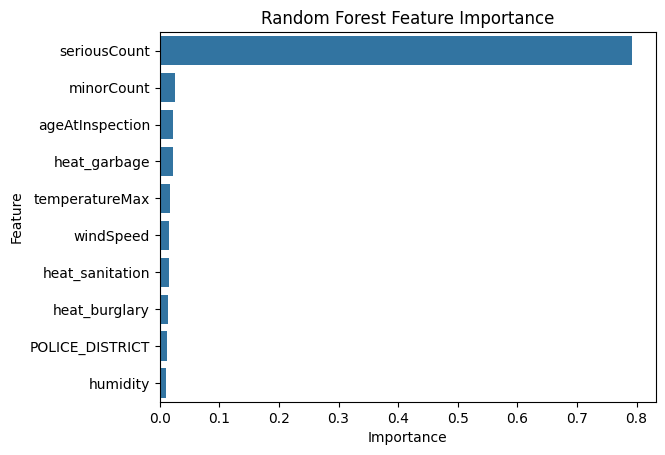

In [26]:
# Random Forest feature importance
# -----------

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(best_rf_model.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.title("Random Forest Feature Importance")
plt.show()


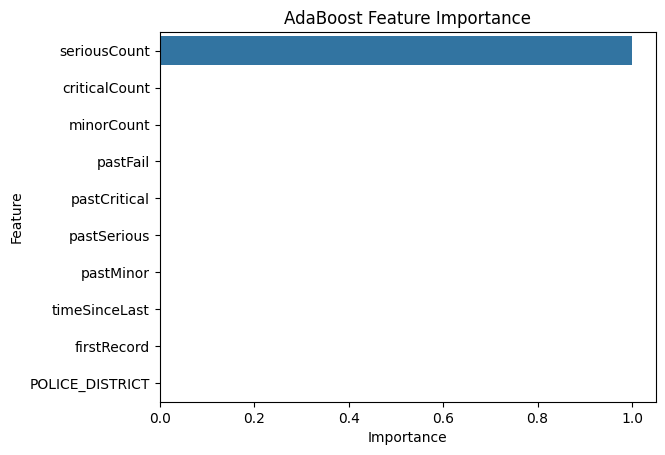

In [27]:
# AdaBoost feature importance
# -----------

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(best_ada_model.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.title("AdaBoost Feature Importance")
plt.show()

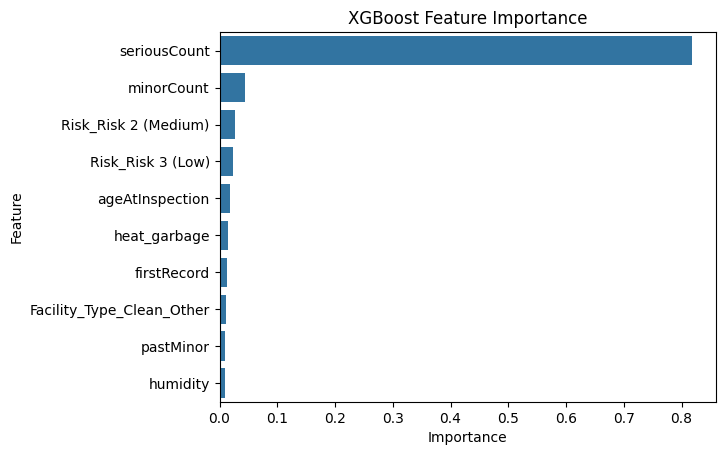

In [28]:
# XGBoost feature importance
# -----------

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(best_xgb_model.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.title("XGBoost Feature Importance")
plt.show()

The SeriousCount variable is by far the most important feature in every model. This makes sense, as it is the count of previous serious violations. Interestingly, the AdaBoost model puts all other features at 0, with the seriousCount as the only one that matters. The other two models give some weight to other features. 

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [29]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
# I am choosing the xgboost model as it has the highest f1 score
predictions = best_xgb_model.predict(X)
probabilities = best_xgb_model.predict_proba(X)

In [30]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
results_df = pd.DataFrame({
    'actual_label': y.ravel(),  # actual outcomes
    'predicted_label': predictions,
    'fail_probability': probabilities[:, 1]  # probability of "Fail"
}).sort_values('fail_probability', ascending=False)

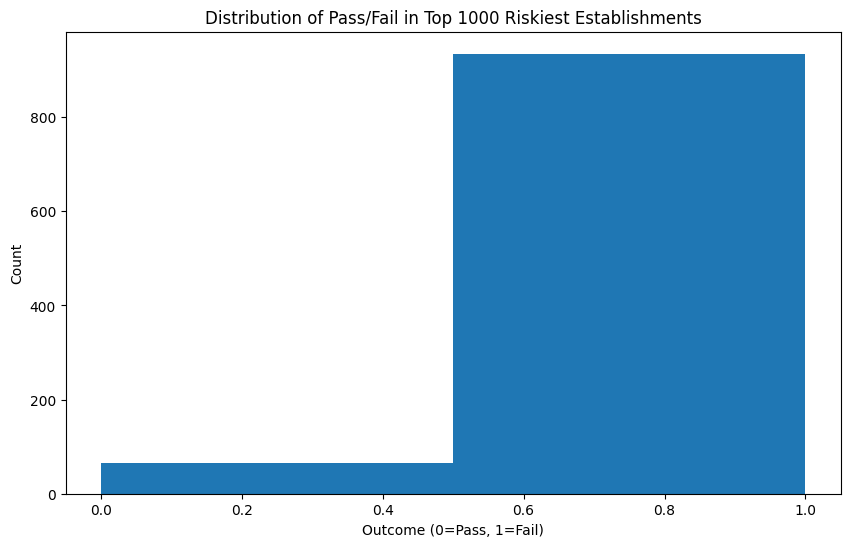

In [31]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
top_1000 = results_df.head(1000)
plt.figure(figsize=(10, 6))
plt.hist(top_1000['actual_label'], bins=2)
plt.title('Distribution of Pass/Fail in Top 1000 Riskiest Establishments')
plt.xlabel('Outcome (0=Pass, 1=Fail)')
plt.ylabel('Count')
plt.show()


In [32]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
random_1000 = chicago_inspections_2011_to_2013.sample(n=1000, random_state=42)
random_failure_rate = (random_1000['Results'] == 'Fail').mean()
print(f"\nFailure rate in 1000 random establishments: {random_failure_rate:.3f}")

# Compare with targeted approach
targeted_failure_rate = (top_1000['actual_label'] == 1).mean()
print(f"Failure rate in top 1000 riskiest establishments: {targeted_failure_rate:.3f}")
print(f"Improvement using predictive auditing: {(targeted_failure_rate - random_failure_rate):.3f}")



Failure rate in 1000 random establishments: 0.203
Failure rate in top 1000 riskiest establishments: 0.935
Improvement using predictive auditing: 0.732


Predictive auditing drastically improved the hit-rate at inspected establishments.

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [50]:
chicago_inspections_2014.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE',
       'LICENSE_DESCRIPTION', 'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY',
       'LICENSE_NUMBER', 'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement

In [ ]:
# data processing
# -----------
# Complete pre-processing in the same way as the training data
# -----------

# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                            'License',
                                            'Address',
                                            'City',
                                            'State',
                                            'Zip',
                                            'Latitude',
                                            'Longitude',
                                            'Location',
                                            'ID',
                                            'LICENSE_ID',
                                            'LICENSE_TERM_START_DATE',
                                            'LICENSE_TERM_EXPIRATION_DATE',
                                            'LICENSE_STATUS',
                                            'ACCOUNT_NUMBER',
                                            'LEGAL_NAME',
                                            'DOING_BUSINESS_AS_NAME',
                                            'ADDRESS',
                                            'CITY',
                                            'STATE',
                                            'ZIP_CODE',
                                            'WARD',
                                            'PRECINCT',
                                            'LICENSE_CODE',
                                            'BUSINESS_ACTIVITY_ID',
                                            'BUSINESS_ACTIVITY',
                                            'LICENSE_NUMBER',
                                            'LATITUDE',
                                            'LONGITUDE'],
                                        inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

# convert the inspection date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])  

# drop datetime info
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                    'minDate',
                                                                    'maxDate'],
                                                                    axis = 1)

Index(['Facility_Type', 'Risk', 'Inspection_Type', 'Facility_Type_Clean',
       'criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound', 'Results'],
      dtype='object')

In [ ]:
# process target 
# -----------
y_test2014 = chicago_inspections_2014['Results']

# Binarize outcome variable
# -----------
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)


# process features
# -----------
# create feature dataset
X_test2014 = chicago_inspections_2014.drop(columns = ['Results', 
                                                      'Facility_Type', 
                                                      'LICENSE_DESCRIPTION', 
                                                      'WARD_PRECINCT'])

# get dummies
X_test2014 = pd.get_dummies(X_test2014)

In [ ]:
# predict and compare 
# -----------
# Make predictions using the best XGBoost model
predictions_2014 = best_xgb_model.predict(X_test2014)
probabilities_2014 = best_xgb_model.predict_proba(X_test2014)

2014 Test Set Metrics:
--------------------
Accuracy: 0.900
Precision: 0.692
Recall: 0.894
F1 Score: 0.780


2014 Test Set Metrics:
--------------------
Accuracy: 0.900
Precision: 0.692
Recall: 0.894
F1 Score: 0.780


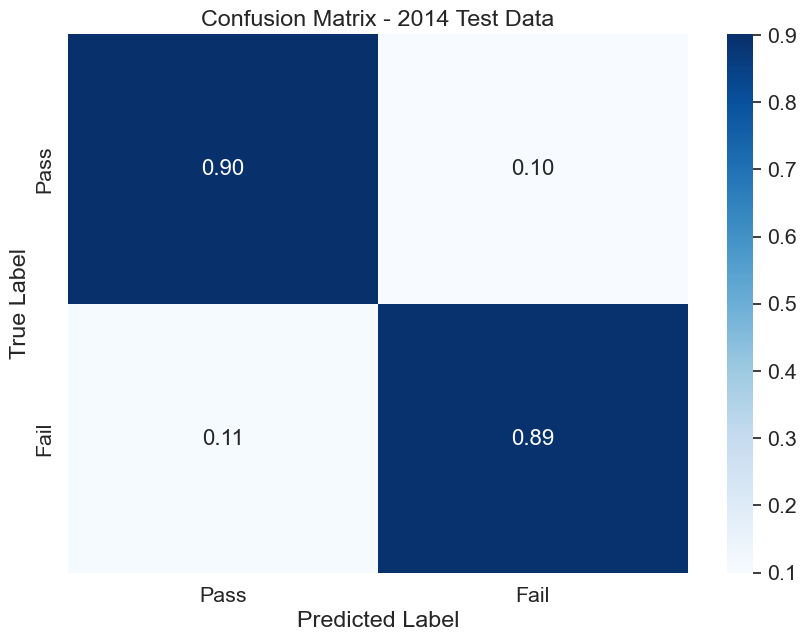

In [58]:
from sklearn.metrics import confusion_matrix
print("2014 Test Set Metrics:")
print("-" * 20)
print(f"Accuracy: {accuracy_score(y_test2014, predictions_2014):.3f}")
print(f"Precision: {precision_score(y_test2014, predictions_2014):.3f}")
print(f"Recall: {recall_score(y_test2014, predictions_2014):.3f}")
print(f"F1 Score: {f1_score(y_test2014, predictions_2014):.3f}")

# evaluate
# -----------
# create a confusion matrix
cf_matrix = confusion_matrix(y_test2014, 
                           predictions_2014, 
                           normalize="true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='.2f',    # show as percentage with 2 decimal places
           cmap='Blues')

# plot
plt.title("Confusion Matrix - 2014 Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Choosing a metric for policy implementation

From a policy perspective, I would focus on Recall (0.894) as the most important metric for this food safety inspection scenario. Recall measures the proportion of actual failures are correctly identified (TP / (TP + FN)). This is the most important metric here because the cost to society of missing a failing establishment (false negative) is much higher than incorrectly flagging a passing one (false positive). Resources spent on inspecting a passing establishment (false positive) is a much smaller concern than missing serious health violations. Our recall rate here is 89%, meaning 89% were correctly predicted to fail. This is a strong sign of suport that our model can be used to target food safety inspections. 



## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


We need metrics beyond accuracy because policy decisions often involve complex trade-offs where different types of errors have vastly different real-world consequences. For example, in food safety inspections, failing to identify a dangerous establishment (false negative) could lead to serious illness or death, while conducting an unnecessary inspection (false positive) only costs time and resources - yet accuracy treats these errors equally. Additionally, many policy problems involve imbalanced classes where one outcome is much more common; a model could achieve high accuracy by simply predicting the majority class, masking its poor performance on minority cases. 

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

In order to address this problem, policymakers would regularly need to retrain the model with new data and additional/new features, so that the model can adapt to new behaviors. Additionally, policymakers could maintain a baseline level of random audits, for example maintaining a 20% rate of random inspections, so that establishments can't completely game the system. 